In [110]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn.mixture import GaussianMixture

 Step 1: Choosing the Best Number of Components (n_components)

A common approach is using AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion).

📌 AIC & BIC:
Lower values indicate a better model fit.

BIC is more strict than AIC (penalizes extra parameters more).

Helps prevent overfitting (too many clusters) and underfitting (too few clusters).

In [111]:
# Generate synthetic dataset

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.9, random_state=42)

In [112]:
# Try different numbers of components

n_components_range = range(1,10)

aic_values = []

bic_values =[]

In [113]:
for n in n_components_range:

    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)

    gmm.fit(X)

    aic_values.append(gmm.aic(X))

    bic_values.append(gmm.bic(X))

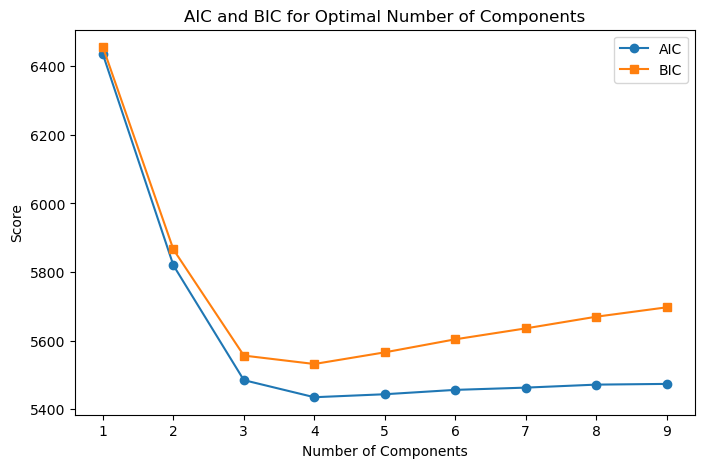

In [114]:
# Plot AIC and BIC values


plt.figure(figsize=(8,5))

plt.plot(n_components_range, aic_values, label='AIC', marker='o' )

plt.plot(n_components_range, bic_values, label='BIC', marker='s' )

plt.xlabel('Number of Components')

plt.ylabel('Score')

plt.legend()

plt.title("AIC and BIC for Optimal Number of Components")

plt.show()

Step 2: Choosing the Best covariance_type


Each dataset has different cluster shapes.

🔹 Key Observations:

If clusters have different orientations → Use full.
If clusters have circular shapes → Use spherical.
If clusters share structure → Use tied.

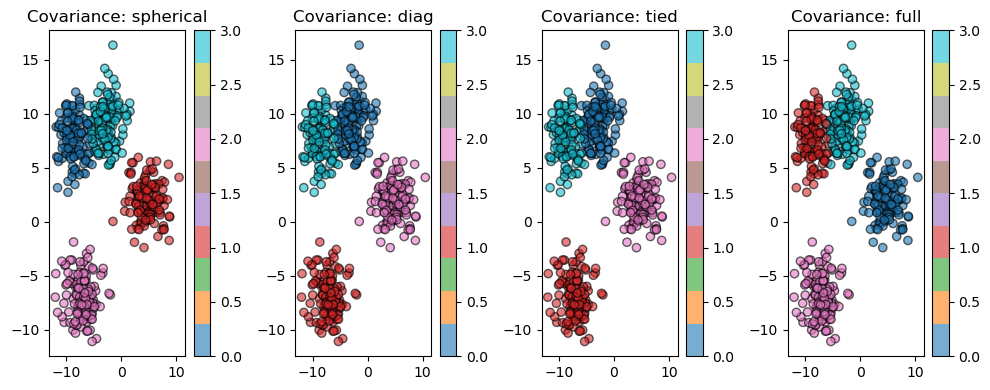

In [115]:
covariance_types = ['spherical', 'diag', 'tied', 'full']

plt.figure(figsize=(10, 4))

for i, cov_type in enumerate(covariance_types, 1 ):

    gmm = GaussianMixture(n_components=4, covariance_type=cov_type, random_state= 42 +i)

    gmm.fit(X)

    label = gmm.predict(X)

    plt.subplot(1,4,i)

    plt.scatter(X[:,0],X[:,1], c=label, cmap='tab10', edgecolors='k',alpha = 0.6 )

    plt.colorbar()  # Show color scale

    plt.title(f'Covariance: {cov_type}')


plt.tight_layout()

plt.show()


Step 3: Improving Convergence Speed (tol)

Default tol=1e-3 works well in most cases.
Lower values (e.g., 1e-4) improve precision but increase runtime.
Higher values (e.g., 1e-2) speed up convergence but may miss optimal parameters.